In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [10]:
df.rename(columns ={'Gender':'gender', 'Age':'age','Annual Income (k$)':'income','Spending Score (1-100)':"score"},inplace = True)


In [11]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
df.shape

(200, 5)

In [13]:
df.isnull().values.any()

False

In [17]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


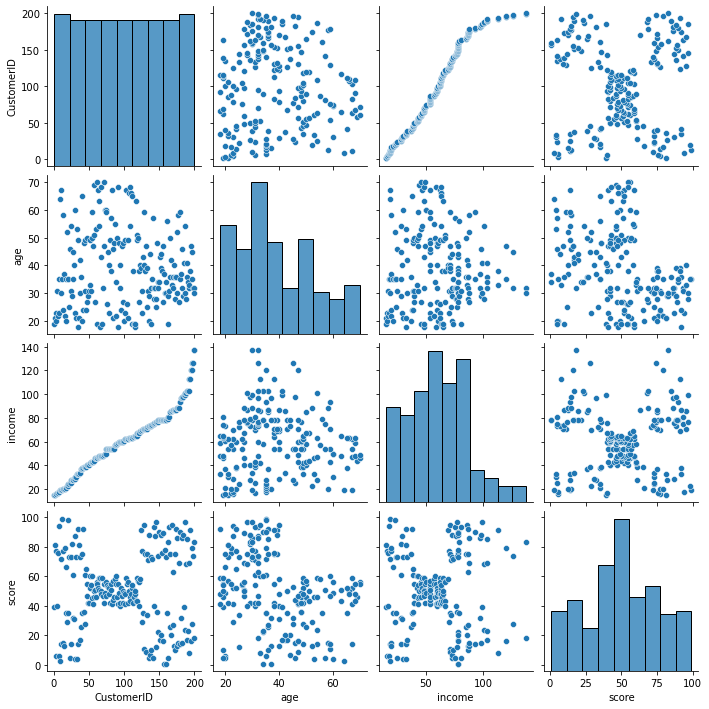

In [19]:
sns.pairplot(df)

In [20]:
import sklearn.cluster as cluster

In [21]:
kmeans = cluster.KMeans(n_clusters=5)

In [23]:
kmeans = kmeans.fit(df[['score','income']])

In [24]:
kmeans.cluster_centers_

array([[82.12820513, 86.53846154],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [79.36363636, 25.72727273],
       [20.91304348, 26.30434783]])

In [25]:
df['income_cluster'] = kmeans.labels_

In [26]:
df

,CustomerID,gender,age,income,score,income_cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,2
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [27]:
df['income_cluster'].value_counts()

1    81
0    39
2    35
4    23
3    22
Name: income_cluster, dtype: int64

<AxesSubplot:xlabel='income', ylabel='score'>

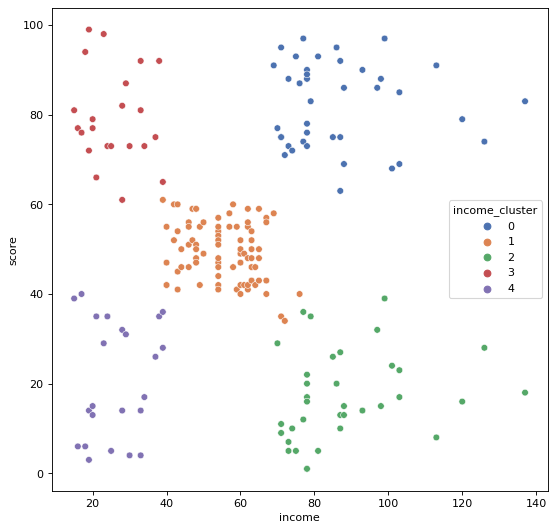

In [38]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

sns.scatterplot(x = 'income',y='score', hue = 'income_cluster',data= df,palette="deep")

In [39]:
kmeans = cluster.KMeans(n_clusters=2)

In [40]:
kmeans = kmeans.fit(df[['age','income']])

In [41]:
kmeans.cluster_centers_

array([[42.21904762, 40.78095238],
       [35.12631579, 82.42105263]])

In [42]:
df['age_cluster'] = kmeans.labels_

In [43]:
df

,CustomerID,gender,age,income,score,income_cluster,age_cluster
0,1,Male,19,15,39,4,0
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,0
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,0,1
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,2,1


In [45]:
df['age_cluster'].value_counts()

0    105
1     95
Name: age_cluster, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

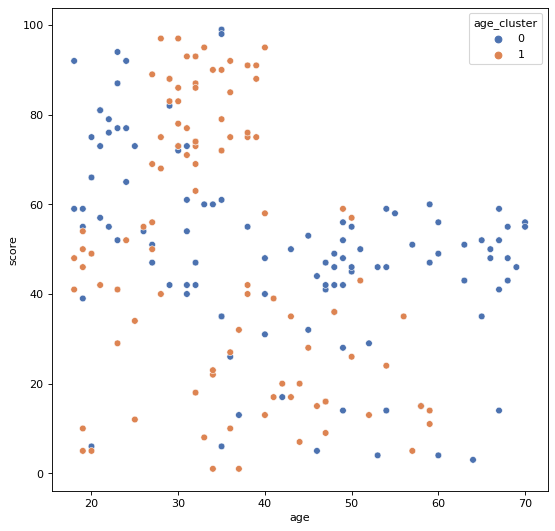

In [66]:
from matplotlib.pyplot import figure
figure(figsize=(8, 8), dpi=80)

sns.scatterplot(x = 'age',y='score', hue = 'age_cluster',data= df,palette="deep")

In [57]:
from sklearn.cluster import KMeans

In [58]:
K_range = range(1,12)
wcss = []

In [59]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

In [60]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 24986.52564064289,
 21850.16528258562,
 19634.554629349972,
 17778.976141202977]

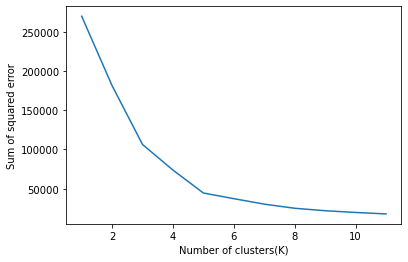

In [61]:
plt.xlabel("Number of clusters(K)")
plt.ylabel("Sum of squared error")
plt.plot(K_range,wcss)

In [62]:
K_range = range(1,12)
wcss = []

In [63]:
for k in K_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    wcss.append(km.inertia_)

In [64]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23830.033602505435,
 19492.611301496087,
 15514.193134351033,
 13039.801560846568,
 11441.98824268596,
 10173.59553376906,
 9609.35885250016]

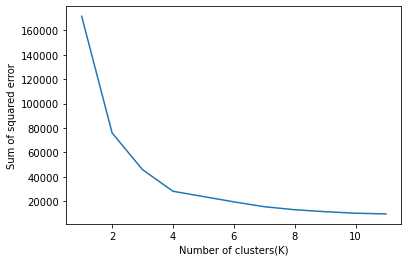

In [65]:
plt.xlabel("Number of clusters(K)")
plt.ylabel("Sum of squared error")
plt.plot(K_range,wcss)